# Knn Investigation

Objective:
In this notebook, we will apply the K-Nearest Neighbors (KNN) algorithm to the Iris dataset. Our goal is to explore how sensitive the algorithm is to the parameter
k (the number of neighbors). We'll use Stratified K-Fold Cross-Validation to assess the model performance for different values of k, ranging from 1 to 20, and analyze the results.


####The Fisher-Iris Dataset
The dataset is composed of 150 samples of irises (flowers) with four attributes per flower.  There are three species of iris with 50 samples of each kind.   The dataset is a simple one to use for classification tasks where the goal is to predict the label (species) by using the four attributes.

In [ ]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


###1. Load the Iris Dataset and Preprocess the Data

We use the Iris dataset, which contains 150 samples of 3 different species of iris flowers, with 4 features per sample (sepal length, sepal width, petal length, petal width).
Standardization is performed using StandardScaler to ensure all features have a mean of 0 and standard deviation of 1. This is important for KNN since it is a distance-based algorithm.

In [ ]:
def load_and_preprocess_data():
    """
    Load the Iris dataset and standardize (scale) the features.

    Returns:
        X (ndarray): Standardized feature data (4 features per sample).
        y (ndarray): Labels (species) for each sample.
    """
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data  # Features: 4 attributes for each flower sample
    y = iris.target  # Labels: 0 = Setosa, 1 = Versicolor, 2 = Virginica

    # Standardize the feature data using StandardScaler
    # This ensures that all features are on the same scale, which is important for distance-based algorithms like KNN.
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Load and preprocess the data
X, y = load_and_preprocess_data()

###2. K-Fold Cross-Validation:

We use Stratified K-Fold Cross-Validation with 50 folds. Stratified sampling ensures that the class proportions remain balanced in both the training and testing sets.

For each value of
k, we:

- Train a KNN model on the training set (created by combining
k−1 folds).

- Test the model on the remaining fold.

- Repeat this process for all 50 folds and compute the mean accuracy for each value of
k.

In [ ]:
def perform_kfold_cross_validation(X, y, k_values, n_splits=50):
    """
    Perform Stratified K-Fold Cross-Validation for different K values of the K-Nearest Neighbors algorithm.

    Args:
        X (ndarray): Feature data (standardized).
        y (ndarray): Target labels.
        k_values (range): Range of k values to evaluate in KNN.
        n_splits (int): Number of folds for cross-validation (default: 50).

    Returns:
        mean_accuracies (list): Mean accuracy scores for each k value.
    """
    # Set up Stratified K-Fold cross-validation
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # List to store the mean accuracy for each value of k
    mean_accuracies = []

    # Loop over each value of k (from 1 to 20, for example)
    for k in k_values:
        accuracies = []  # Store accuracies for each fold for this k

        # Initialize the KNN classifier with the current k value
        knn = KNeighborsClassifier(n_neighbors=k)

        # Perform cross-validation by iterating over each fold
        for train_index, test_index in kf.split(X, y):
            # Split the data into training and testing sets for this fold
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Fit the KNN model on the training set
            knn.fit(X_train, y_train)

            # Evaluate the model on the test set and store the accuracy
            accuracy = knn.score(X_test, y_test)
            accuracies.append(accuracy)

        # Calculate the mean accuracy across all folds for this k value
        mean_accuracies.append(np.mean(accuracies))

    return mean_accuracies

# Define the range of k values to test (from 1 to 20)
k_values = range(1, 21)

# Perform 50-fold cross-validation for each k value
mean_accuracies = perform_kfold_cross_validation(X, y, k_values, n_splits=50)

###3. Plot the Mean Accuracy vs. k

This function generates a plot of the mean accuracy vs.
k (the number of neighbors).
The plot helps visualize how the performance of the KNN model changes as we vary the value of
k.
The x-axis shows the different
k
k values, and the y-axis shows the mean accuracy across the 50 folds for each
k.

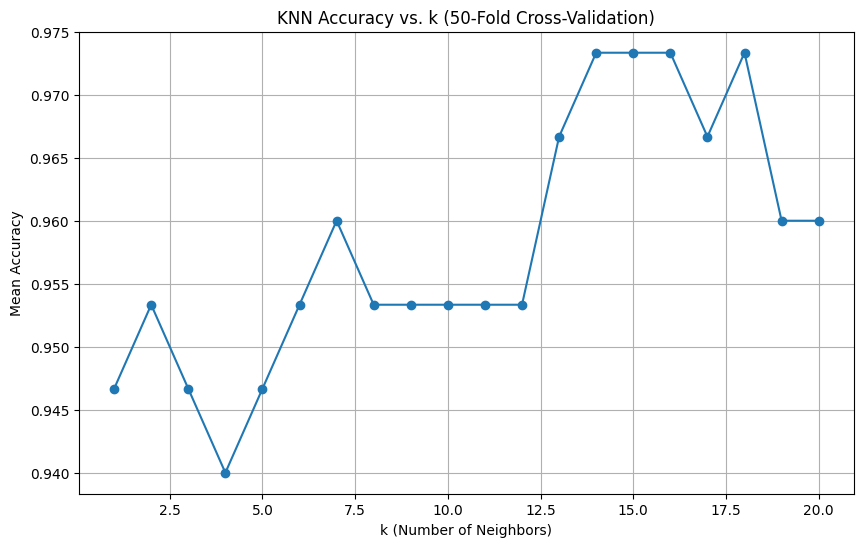

In [ ]:
def plot_accuracies(k_values, mean_accuracies):
    """
    Plot the mean accuracy scores against the corresponding k values.

    Args:
        k_values (range): Range of k values used in KNN.
        mean_accuracies (list): Mean accuracy scores for each k value.
    """
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mean_accuracies, marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Mean Accuracy')
    plt.title('KNN Accuracy vs. k (50-Fold Cross-Validation)')
    plt.grid(True)
    plt.show()

# Plot the mean accuracy for each k value
plot_accuracies(k_values, mean_accuracies)


### Plot Analysis
The plot of mean accuracy vs.

k will show how the accuracy changes as the number of neighbors increases:

1. Low

k Values (e.g.,k=1):
When k is very small, especially when k=1, the model is more likely to overfit to the training data, as it only considers the closest neighbor.This may lead to lower accuracy on the test data due to poor generalization.

2. Medium

k Values (e.g.,k=5):
As k increases, the model begins to generalize better, resulting in higher test accuracy.
The model balances between capturing the structure of the data and avoiding overfitting.

3. Large

k Values (e.g. k≥15):
When k becomes too large, the model underfits the data because it considers too many neighbors, leading to a loss of fine-grained distinctions.
Both training and testing accuracy may decline as the decision boundaries become too smooth.
By analyzing this plot, we can determine the optimal value of
k for the Iris dataset, where the model achieves the highest accuracy.

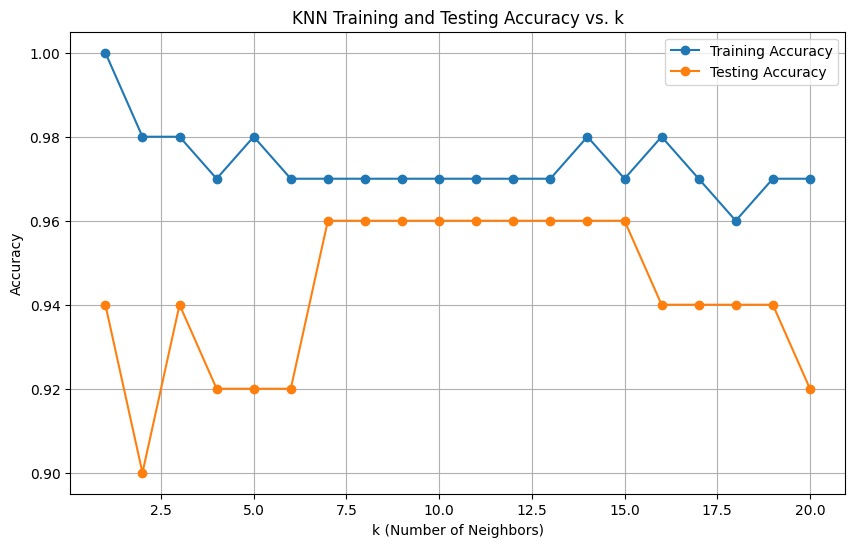

In [ ]:
#comparing tha training and testing accuracy against values of k

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and testing sets (use 2/3 for training, 1/3 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lists to store training and testing accuracy scores
training_accuracy = []
testing_accuracy = []

# Test k values from 1 to 20
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model using the training data
    knn.fit(X_train, y_train)

    # Append the accuracy for training data
    training_accuracy.append(knn.score(X_train, y_train))

    # Append the accuracy for testing data
    testing_accuracy.append(knn.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(k_values, testing_accuracy, label='Testing Accuracy', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Training and Testing Accuracy vs. k')
plt.legend()
plt.grid(True)
plt.show()

Explanation of the Code:
Training vs. Testing Accuracy: For each value of
k, the code calculates the accuracy on the training data and the testing data using the score() method. These values are stored in two separate lists: training_accuracy and testing_accuracy.
Overfitting: You can identify overfitting when the training accuracy is much higher than the testing accuracy, especially for low values of k. The model may perform very well on the training set but fail to generalize to the testing set.
Underfitting: As k increases, if both the training and testing accuracy drop and remain consistently low, the model is underfitting the data. This happens because, at large k
k values, the model averages over too many neighbors, making it too simplistic.
Interpreting the Graph:
- Overfitting: You will likely see overfitting at small
k values (e.g., k=1) where training accuracy is high but testing accuracy is low.
- Underfitting: At large
k values (e.g.,
k≥10), both training and testing accuracy will tend to decrease, indicating that the model is underfitting.
Example Output (Hypothetical):
k	Training Accuracy	Testing Accuracy
1	1.00	0.90
3	0.97	0.92
5	0.95	0.93
10	0.90	0.88
15	0.85	0.84
20	0.80	0.80
Conclusion:
Overfitting: Occurs when
k is small (e.g.k=1), where training accuracy is high but testing accuracy is low.
Underfitting: Occurs at larger k values (e.g.
k=15), where both training and testing accuracy decrease, indicating that the model cannot capture the structure of the data.

### 2D Visualization of the Dataset
The scatter plot of the first two principal components of the dataset.
It highlights the distribution of different classes by illustrating the data points, colored by species. Misclassified test samples are marked as X.

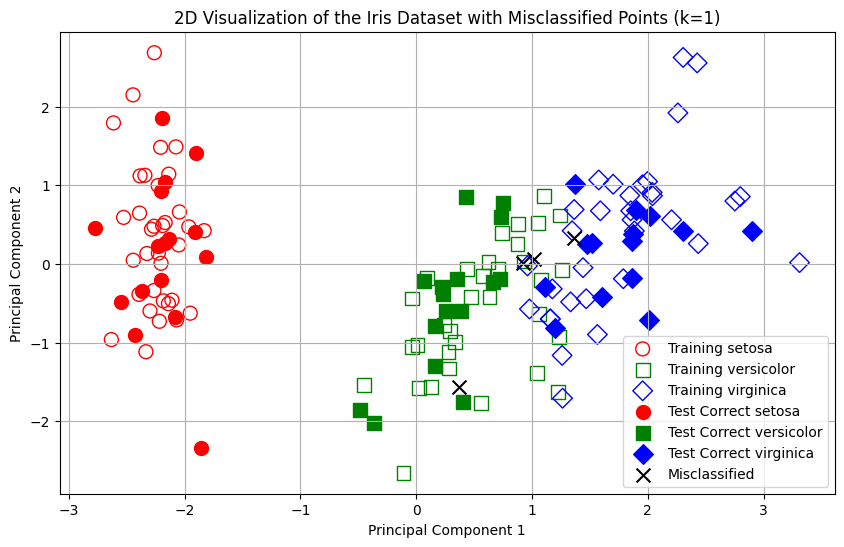

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix (shape: [n_samples, n_features])
y = iris.target  # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use StratifiedShuffleSplit to create a single split into training and testing sets
# Stratified splitting ensures that each class is proportionally represented in both sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)

# Generate the train/test indices
for train_index, test_index in sss.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Create a KNN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier on the training data
knn.fit(X_train_pca, y_train)

# Predict labels on the test set
y_pred = knn.predict(X_test_pca)

# Identify misclassified samples
misclassified = y_pred != y_test

# Set up the plot
plt.figure(figsize=(10, 6))

# Create color maps and markers for the classes
colors = ['red', 'green', 'blue']  # Colors for each class
markers = ['o', 's', 'D']          # Markers for each class

# Plot the training data as empty markers (edgecolors only)
# This helps distinguish training data from test data
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                label=f'Training {target_name}', marker=markers[i],
                edgecolor=colors[i], facecolors='none', s=100)

# Plot the correctly classified test data with filled markers
for i, target_name in zip([0, 1, 2], iris.target_names):
    # Select test samples of class i that were correctly classified
    idx = (y_test == i) & (~misclassified)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1],
                label=f'Test Correct {target_name}', marker=markers[i],
                color=colors[i], s=100)

# Plot the misclassified test data with a distinct marker
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            label='Misclassified', marker='x', color='black', s=100)

# Add labels and title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of the Iris Dataset with Misclassified Points (k=1)')

# Add a legend to identify different classes and markers
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

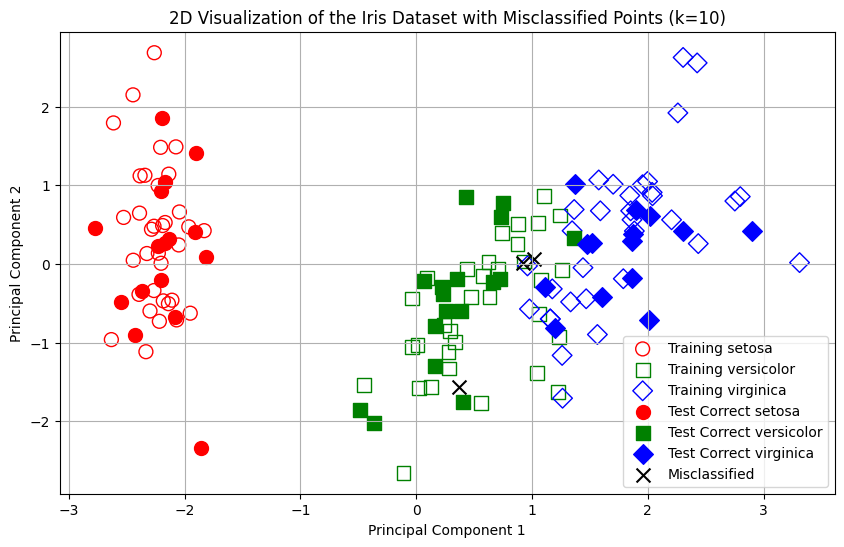

In [ ]:
# Create a KNN classifier with k=15
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier on the training data
knn.fit(X_train_pca, y_train)

# Predict labels on the test set
y_pred = knn.predict(X_test_pca)

# Identify misclassified samples
misclassified = y_pred != y_test

# Set up the plot
plt.figure(figsize=(10, 6))

# Create color maps and markers for the classes
colors = ['red', 'green', 'blue']  # Colors for each class
markers = ['o', 's', 'D']          # Markers for each class

# Plot the training data as empty markers (edgecolors only)
# This helps distinguish training data from test data
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                label=f'Training {target_name}', marker=markers[i],
                edgecolor=colors[i], facecolors='none', s=100)

# Plot the correctly classified test data with filled markers
for i, target_name in zip([0, 1, 2], iris.target_names):
    # Select test samples of class i that were correctly classified
    idx = (y_test == i) & (~misclassified)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1],
                label=f'Test Correct {target_name}', marker=markers[i],
                color=colors[i], s=100)

# Plot the misclassified test data with a distinct marker
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            label='Misclassified', marker='x', color='black', s=100)

# Add labels and title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of the Iris Dataset with Misclassified Points (k=10)')

# Add a legend to identify different classes and markers
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

Explanation of the Code:
The two functions illustrates the misclassified test
samples for k = 1 and k = 10, marked with X. After acknowledging that there are misclassifications occur where classes overlap when k = 1. This indicates the need for more neighbors (higher value of k) to classify points correctly.


Thus, we selected k = 10 because the test accuracy reaches its peak at this intermediate value of k and avoid underfitting at the same time. As shown in the graph, there
are fewer misclassifications compared to when k = 1.
This suggests that using a larger value of k reduces
overfitting by minimizing class overlap, while avoid-
ing underfitting that may occur with excessively large
k values (e.g., k ≥ 15). Therefore, selecting an inter-
mediate k value, such as k = 7, effectively balances
between overfitting and underfitting.